# **Reuse CNN with Mnist Model on Omniglot Dataset**

In [ ]:
import tensorflow as tf
%load_ext tensorboard
from keras.callbacks import TensorBoard
import keras
from keras import layers
from datetime import datetime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


## **LOAD DATASET**

In [ ]:
from keras.datasets import mnist
import numpy as np

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [ ]:
# divide x_test into validation and test
X_val = X_test[:7000]
X_test = X_test[7000:]

In [ ]:
print("validation data: {0} \ntest data: {1}".format(X_val.shape, X_test.shape))

validation data: (7000, 28, 28, 1) 
test data: (3000, 28, 28, 1)


## **DEFINE CNN MODEL**

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

In [ ]:
X = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
X = layers.MaxPooling2D((2, 2), padding='same')(X)
X = layers.Dropout(0.25)(X)
X = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(X)
X = layers.MaxPooling2D((2, 2), padding='same')(X)
X = layers.Dropout(0.25)(X)
X = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(X)
encoded = layers.MaxPooling2D((2, 2), padding='same')(X)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

X = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
X = layers.UpSampling2D((2, 2))(X)
X = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(X)
X = layers.UpSampling2D((2, 2))(X)
X = layers.Conv2D(16, (3, 3), activation='relu')(X)
X = layers.UpSampling2D((2, 2))(X)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(X)

In [ ]:
m_autoencoder = keras.Model(input_img, decoded)
m_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mse'])

In [ ]:
m_autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 8)           0     

## **TRAIN MODEL**

In [ ]:
from keras.callbacks import ModelCheckpoint   
import time

ccn_start = time.time() # for stopwatch

history = m_autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=512,
                shuffle=True,
                validation_data=(X_test, X_test))

ccn_end = time.time()
ccn_took = ccn_end -ccn_start


Epoch 1/10
118/118 [==============================] - 75s 624ms/step - loss: 0.4607 - accuracy: 0.7845 - mse: 0.1292 - val_loss: 0.2234 - val_accuracy: 0.7733 - val_mse: 0.0558
Epoch 2/10
118/118 [==============================] - 75s 638ms/step - loss: 0.2114 - accuracy: 0.7851 - mse: 0.0519 - val_loss: 0.1816 - val_accuracy: 0.7830 - val_mse: 0.0412
Epoch 3/10
118/118 [==============================] - 75s 634ms/step - loss: 0.1815 - accuracy: 0.7930 - mse: 0.0415 - val_loss: 0.1620 - val_accuracy: 0.7869 - val_mse: 0.0342
Epoch 4/10
118/118 [==============================] - 75s 634ms/step - loss: 0.1666 - accuracy: 0.7970 - mse: 0.0361 - val_loss: 0.1516 - val_accuracy: 0.7890 - val_mse: 0.0304
Epoch 5/10
118/118 [==============================] - 73s 618ms/step - loss: 0.1572 - accuracy: 0.7995 - mse: 0.0327 - val_loss: 0.1435 - val_accuracy: 0.7917 - val_mse: 0.0274
Epoch 6/10
118/118 [==============================] - 75s 634ms/step - loss: 0.1511 - accuracy: 0.8005 - mse: 0.030

#**OMNIGLOT DATA SET**

In [ ]:
! git clone https://github.com/brendenlake/omniglot # run this only ONCE

Cloning into 'omniglot'...
remote: Enumerating objects: 81, done.
remote: Total 81 (delta 0), reused 0 (delta 0), pack-reused 81
Unpacking objects: 100% (81/81), done.
Checking out files: 100% (32/32), done.


In [ ]:
!unzip "/content/drive/My Drive/omniglot/python/images_background.zip" -d "/content/drive/My Drive/omniglot/python/" # run this code line only once

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/omniglot/python/images_background/Malay_(Jawi_-_Arabic)/character28/0583_05.png  
  inflating: /content/drive/My Drive/omniglot/python/images_background/Malay_(Jawi_-_Arabic)/character28/0583_06.png  
  inflating: /content/drive/My Drive/omniglot/python/images_background/Malay_(Jawi_-_Arabic)/character28/0583_07.png  
  inflating: /content/drive/My Drive/omniglot/python/images_background/Malay_(Jawi_-_Arabic)/character28/0583_08.png  
  inflating: /content/drive/My Drive/omniglot/python/images_background/Malay_(Jawi_-_Arabic)/character28/0583_09.png  
  inflating: /content/drive/My Drive/omniglot/python/images_background/Malay_(Jawi_-_Arabic)/character28/0583_10.png  
  inflating: /content/drive/My Drive/omniglot/python/images_background/Malay_(Jawi_-_Arabic)/character28/0583_11.png  
  inflating: /content/drive/My Drive/omniglot/python/images_background/Malay_(Jawi_-_Arabic)/character28/0583_12.png

In [ ]:
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
from skimage.io import imread
import cv2
from PIL import Image

In [ ]:
def load_data(alpha_path):
    X = []
    y = []
    lang_dict = {}
    classNo = 0
    class_n = 0

    for letter in sorted(os.listdir(alpha_path)):
        cat_images= []
        for img in sorted(os.listdir(os.path.join(alpha_path,letter))):
            img_path = os.path.join(alpha_path,letter,img)
           
            img_array = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2GRAY)

            img_pil = Image.fromarray(img_array)
            img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
            
            cat_images.append(img_28x28)
        y.append(cat_images)
        classNo += 1
        X.append(cat_images)
    # class_n+=1
    # if class_n ==10:
    #     break
        #lang_dict[alphabet][1] = classNo-1
    X = np.array(X)
    y = np.array(y)
    return X, y

In [ ]:
train_path = "/content/drive/My Drive/omniglot/python/images_background/Japanese_(katakana)"
X, y = load_data(train_path)

In [ ]:
X.shape, y.shape

((47, 20, 28, 28), (47, 20, 28, 28))

In [ ]:
omn_train = np.reshape(X,(940, 28, 28))
omn_test = np.reshape(y,(940, 28, 28))
print(omn_train.shape, 'train samples')
print(omn_test.shape, 'test samples')

(940, 28, 28) train samples
(940, 28, 28) test samples


##**IMAGE RECONSTRUCTION**

In [ ]:
decoded_imgs = m_autoencoder.predict(omn_test)

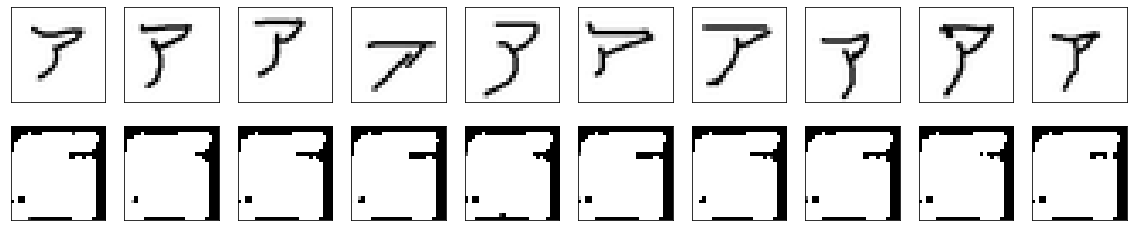

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(omn_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##**MEAN SQUARE ERROR**

In [ ]:
from sklearn.metrics import mean_squared_error
omn_test = omn_test.reshape(940,784)
decoded_imgs = decoded_imgs.reshape(940, 784)

MSE = mean_squared_error(omn_test, decoded_imgs)
MSE

58168.766